<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack_

---

In this lab you will hone your EDA skills and practice constructing simple linear regressions using a dataset on Sacramento real estate sales.  The dataset contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = '../data/sacramento_real_estate_transactions.csv'

In [2]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats

plt.style.use('fivethirtyeight')
%matplotlib inline
# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set we give you. If you find yourself checking for, say, missing/corrupted data over and over, it might be to your long-term benefit to have a function that you can re-use every time you're given some new data.

In [3]:
# A:
sac = pd.read_csv(sac_csv)
sac.head()
# 985 rows, 12 columns
# renamed column name 'sq__ft' to 'sq_ft' (no null values found)
# checked for negative values in 'sq_ft' and 'price': AC state only
# removed 'AC' and 'Unkown' rows

# 'SACRAMENTO' is most represented city
# All 'CA' values in state, Except for one state value 'AC' where price and sq_ft have negative values! Remove!
# No of beds goes from 0 to 8 (108 have 0 - missing values)
# No of baths goes from 0 to 5 (108 have 0 - missing values)
# Sq_ft measurements, where 171 are missing value (i.e. '0')
# Four types of homes: Residential, Condo, Multi-Family and Unkown (1 which has no baths, beds or sq_ft but high price)

# We can drop columns 'street', 'zip', 'state', 'sale_date', 'latitude' and 'longitude' AND 'price' for feature matrix

# 'price' is response variable (y)
# 'city', 'type', 'sq_ft', 'beds', 'baths' is features matrix (X) - drop columns above

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
#sac[sac['sq__ft'].isnull() ].head()
sac.rename(columns={'sq__ft' : 'sq_ft'}, inplace=True)
#sac['sq_ft'].value_counts(dropna=False)
#sac.loc[sac['type'] == 'Unkown']
sac_df = sac[sac.type != 'Unkown']

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in a SLR model. 

**For each of these variables you believe to be valid potential predictors in an SLR model, generate a plot showing the relationship between the independent variable and dependent variable.**

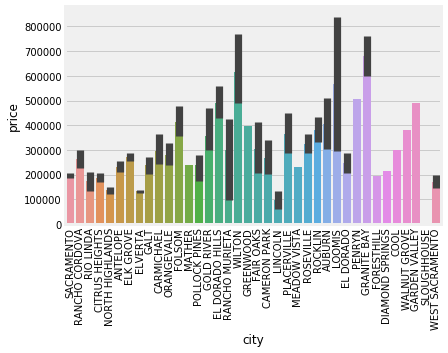

In [5]:
# A : sac_df - 'city' vs 'price'
sns.barplot(x='city', y='price', data=sac_df);
plt.xticks(rotation=90);

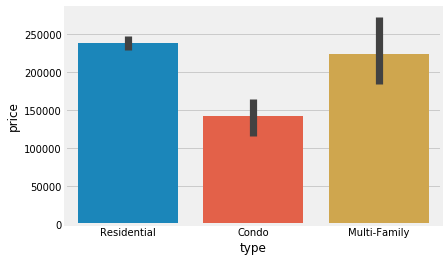

In [6]:
# A : sac_df - 'type' vs 'price'
sns.barplot(x='type', y='price', data=sac_df);

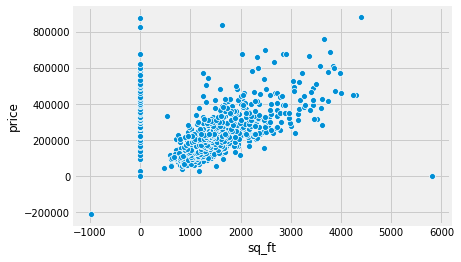

In [7]:
# A : sac_df - 'sq_ft' vs 'price'
sns.scatterplot(x='sq_ft', y='price', data=sac_df);

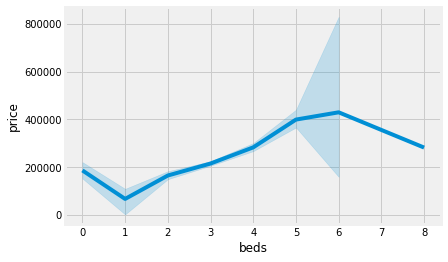

In [8]:
# A : sac_df - 'beds' vs 'price'
sns.lineplot(x='beds', y='price', data=sac_df);

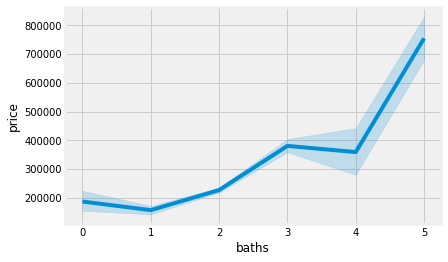

In [9]:
# A : sac_df - 'baths' vs 'price'
sns.lineplot(x='baths', y='price', data=sac_df);

### 4. Which variable would be the best predictor of Y in a SLR model? Why?

In [10]:
# A: sq_ft (remove outliers 0) shows most linear relationship with price - as one goes up so does the other
#sac_df.loc[sac_df['sq_ft'] == 0]
sac_model = sac_df[sac_df.sq_ft != 0]

sac_model.head()

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [11]:
y = sac_model['price'] # target variable
X = np.array(sac_model['sq_ft']).reshape(-1, 1) # predictor variable

### 5. Build a function that will take in two lists `Y` and `X` and returns the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [12]:
# A: 
def intercept_and_coef(X, y):
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(X, y)
    
    coefficients = lr.coef_
    intercept = lr.intercept_
    
    return intercept, coefficients

In [13]:
print(intercept_and_coef(X, y))

(28521.05799033254, array([126.14428564]))


### 6. Interpret the intercept. Interpret the slope.

In [14]:
# A: The intercept is too large to be useful/ The slope is positive,  quite strong linear relationship
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
    
coefficients = lr.coef_
intercept = lr.intercept_

y_pred = coefficients[0]*X + intercept

In [15]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print('Mean squared error: %f'% mse)
print('Root mean squared error: %f'% rmse)

Mean squared error: 7452018493.833993
Root mean squared error: 86325.074537


In [16]:
# R-squared calculation outputs ~49% for how well model fits data
from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.4888210964813726

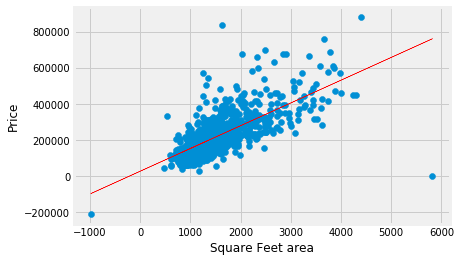

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X,y);
plt.plot(X,y_pred,'r',linewidth=0.5);
plt.xlabel('Square Feet area');
plt.ylabel('Price');
plt.show();

### 7. Give an example of how this model could be used for prediction and how this model could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

In [18]:
# A: 
X_new_data = [[6843], [127456]]
lr.predict(X_new_data)

array([  891726.40461999, 16106367.12843153])

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [24]:
# A: MAYBE WE SHOULD USE INSERT FOR ADDING NEW COLUMNS????
# Formula for prediction: y = 28521.06 + 126.14x
# Create a list of predicted values
y_pred = []

for x in sac_model['sq_ft']:
    y = 28521.06 + (126.14*x)
    y_pred.append(y)

In [29]:
# Adding list of value as new column
sac_model['y_predictions'] = y_pred

# Residuals equals the difference between Y-True and Y-Pred
sac_model['residuals'] = abs(sac_model['price'] - sac_model['y_predictions'])

C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shmel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [30]:
sac_model['residuals'].mean()

60238.14542997537

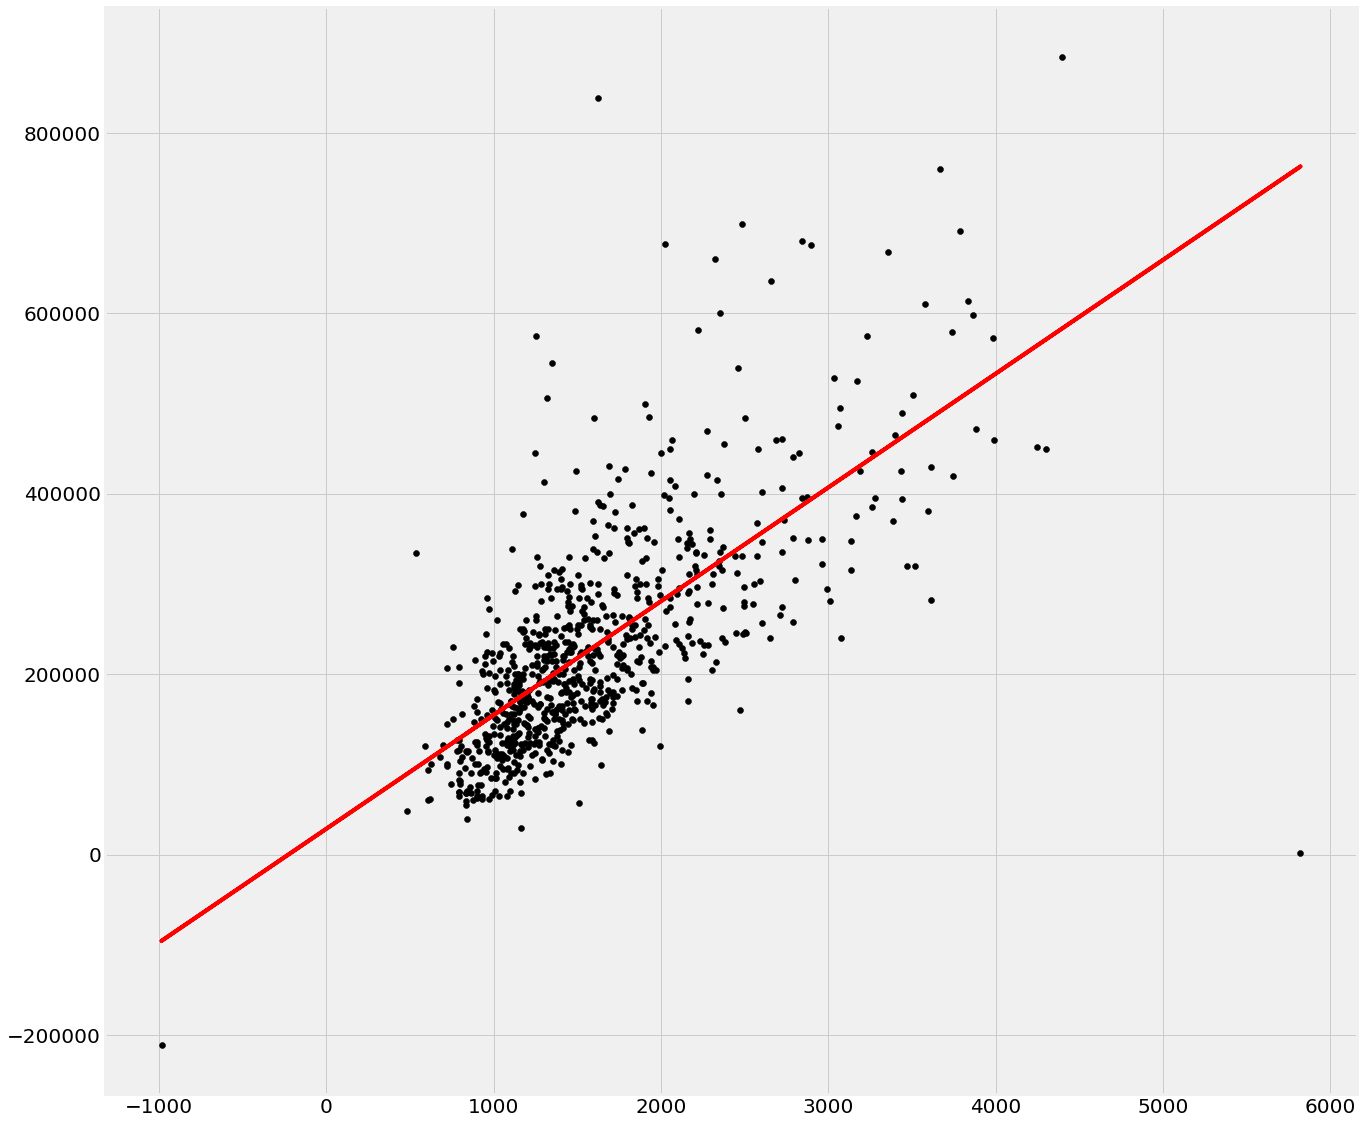

In [31]:
# Plot to show linear forecast
fig = plt.figure(figsize=(20,20))

# change fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x= sac_model['sq_ft'], y=sac_model['price'], c='k')
ax.plot(sac_model['sq_ft'], sac_model['y_predictions'], color='r');

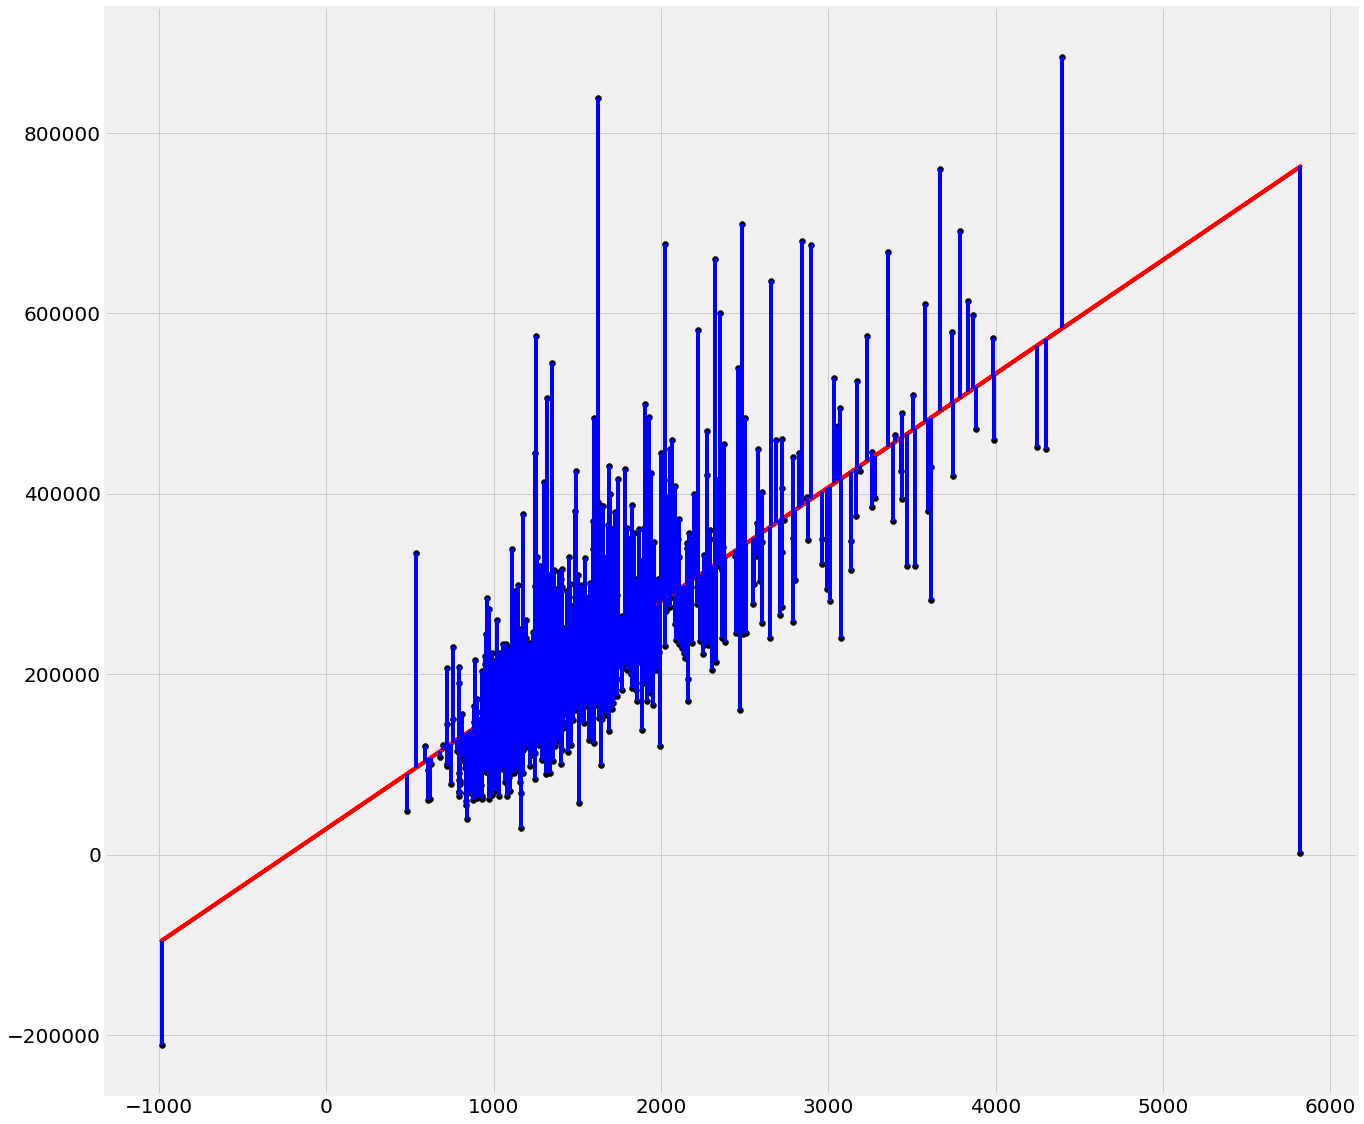

In [35]:
# Now, plot with residuals
fig = plt.figure(figsize=(20,20))

# change the fontsize of minor ticks label
plot = fig.add_subplot(111)
plot.tick_params(axis='both', which='major', labelsize=20)

# get the axis of that figure
ax = plt.gca()

# plot a scatter plot on it with our data
ax.scatter(x=sac_model['sq_ft'], y=sac_model['price'], c='k')
ax.plot(sac_model['sq_ft'], sac_model['y_predictions'], color='r');

# iterate over predictions
for _, row in sac_model.iterrows():
    plt.plot((row['sq_ft'], row['sq_ft']), (row['price'], row['y_predictions']), 'b-')

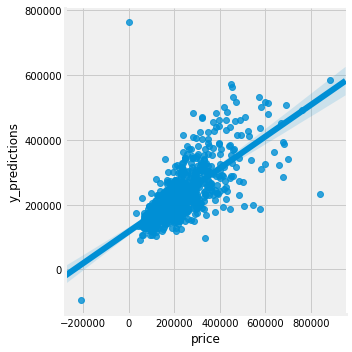

In [33]:
# One more plot, Lets look how our Predictions compared to the true values.
sns.lmplot(x='price', y='y_predictions', data=sac_model);